# Full data, 15-mer, "A" reference nucleotide split examination

In [1]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

from utils.load_splits import load_splits


X_train, y_train, X_val, y_val, X_test, y_test = load_splits(data_version="15fA")

print("X_train example: ", X_train[0])
print("X_val example: ", X_val[0])
print("Ratio of train and val lengths:", len(X_val) / len(X_train), "set to be:", 15 / 70)

X_train example:  tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0.])
X_val example:  tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1.])
Ratio of train and val lengths: 0.2142861888657821 set to be: 0.21428571428571427


## Checking out the dataframe the splits are created off of

In [4]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/15mer_full_A.tsv", sep="\t")

train_dataset, temp_dataset = train_test_split(df, train_size=0.7, random_state=42, stratify=df["mut"])
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=0.5, random_state=42, stratify=temp_dataset["mut"])

In [5]:
train_dataset[:5]

,chrom,pos,context,mut,type
1125865,chr5,98819681,GATGTTCATAGTAGA,0,A->A
35407,chr1,70770591,ATTAGAAAGAAATTA,1,A->G
1455202,chr9,19686590,TCTCATGATAGTGAG,0,A->A
970779,chr4,27478600,AGGAGAGAAAAAATA,0,A->A
87053,chr1,186956205,CTCTGGTATTGAATA,0,A->A


In [6]:
val_dataset[:5]

,chrom,pos,context,mut,type
126791,chr10,7503923,AACTGGGAGGCCGTT,0,A->A
743811,chr2,191217580,CATGCCAAGATATTA,0,A->A
942513,chr3,175200877,ATACTGTACTTATCA,1,A->G
850108,chr3,18357289,GAAATGTAATTCATG,0,A->A
616806,chr19,11128738,TTCTTATACTTATGA,0,A->A


Ratio of mutated to non-mutated sites is consistent across splits

In [12]:
list(Counter(train_dataset["mut"]).values())[0] / list(Counter(train_dataset["mut"]).values())[1]

6.361241729142066

In [13]:
list(Counter(val_dataset["mut"]).values())[0] / list(Counter(val_dataset["mut"]).values())[1]

6.3613094655841405

# Examine 3-mer version of the data
## How many unique 3-mers are there and in what distribution?

In [56]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/3mer_full_A.tsv", sep="\t")

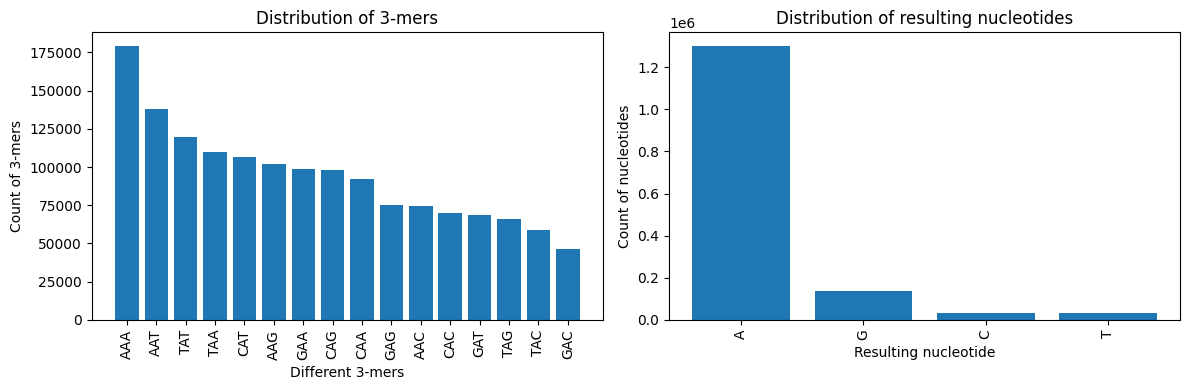

In [57]:
def plot_distr(df):
    context_counts = df["context"].value_counts().to_dict()
    sorted_context_counts = sorted(context_counts.items(), key=lambda item: item[1], reverse=True)
    patterns, context_counts = zip(*sorted_context_counts)

    df["mut_type"] = df["type"].str[-1]
    mut_counts = df["mut_type"].value_counts().to_dict()
    sorted_mut_counts = sorted(mut_counts.items(), key=lambda item: item[1], reverse=True)
    mutations, mut_counts = zip(*sorted_mut_counts)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.bar(range(len(context_counts)), context_counts)
    plt.xticks(range(len(patterns)), patterns, rotation=90)
    plt.xlabel("Different 3-mers")
    plt.ylabel("Count of 3-mers")
    plt.title("Distribution of 3-mers")
    plt.tight_layout()

    plt.subplot(122)
    plt.bar(range(len(mut_counts)), mut_counts)
    plt.xticks(range(len(mutations)), mutations, rotation=90)
    plt.xlabel("Resulting nucleotide")
    plt.ylabel("Count of nucleotides")
    plt.title("Distribution of resulting nucleotides")
    plt.tight_layout()
    plt.show()


plot_distr(df)

## How many combinations of feature-label pairs do we have in the full 3-mer data?

In [ ]:
# df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/3mer_full_A.tsv", sep="\t")

In [40]:
list_of_unique_pairs = []

for row in range(len(df)):
    tup = (df.iloc[row]["context"], df.iloc[row]["mut_type"])
    if tup not in list_of_unique_pairs:
        list_of_unique_pairs.append(tup)

In [41]:
len(list_of_unique_pairs)

64

64 pairs are represented, which is unsurprisingly all possible combinations of 16 different features and 4 different labels. The question now is whether resulting nucleotides are similarly distributed across patterns or not

In [ ]:
temp_df = pd.DataFrame(df["context"])

temp_df["mut_type"] = df["mut_type"]

In [47]:
temp_df.head()

,context,mut_type
0,TAG,A
1,CAT,A
2,GAT,A
3,AAT,A
4,AAC,A


In [48]:
counts = temp_df.groupby(["context", "mut_type"]).value_counts().unstack(fill_value=0)
counts

mut_type,A,C,G,T
context,,,,
AAA,163089,4614,8668,2721
AAC,64850,1472,6606,1456
AAG,90669,2584,6880,1598
AAT,114041,2734,18540,2775
CAA,82669,2781,5614,1325
CAC,61188,2009,5518,1534
CAG,85235,2598,8288,1792
CAT,82307,3221,17789,3553
GAA,89987,2150,4891,1715


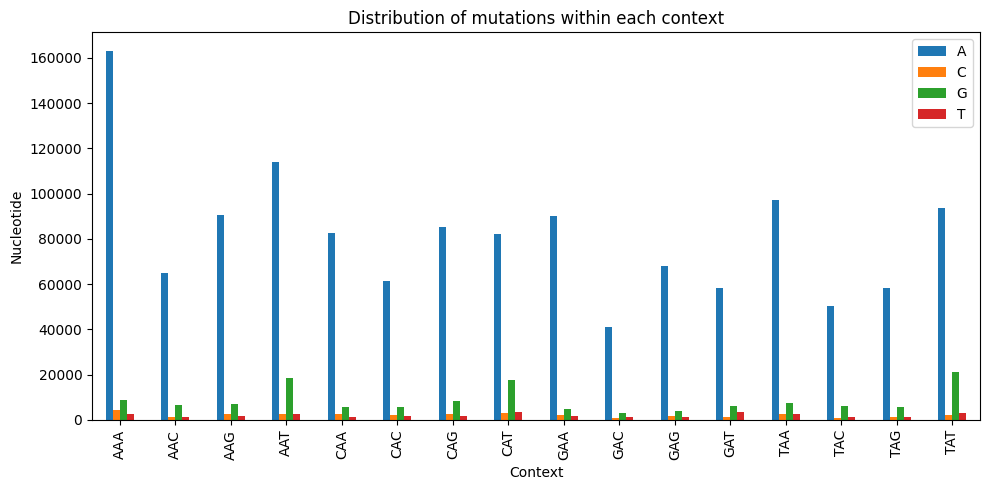

In [50]:
counts.plot(kind="bar", figsize=(10, 5))

plt.title("Distribution of mutations within each context")
plt.xlabel("Context")
plt.ylabel("Nucleotide")
plt.legend()
plt.tight_layout()

plt.show()

# Examine reduced 3-mer version (current "experiments")

In [58]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/3mer_full_A.tsv", sep="\t")

df_nonmut = df[df["mut"] == 0]
df_mut = df[df["mut"] == 1]

df_nonmut_reduced, _ = train_test_split(df_nonmut, train_size=0.1, random_state=42, stratify=df_nonmut["context"])

df = pd.concat([df_mut, df_nonmut_reduced], axis=0)

In [52]:
df.to_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/experiment_full.tsv", sep="\t")

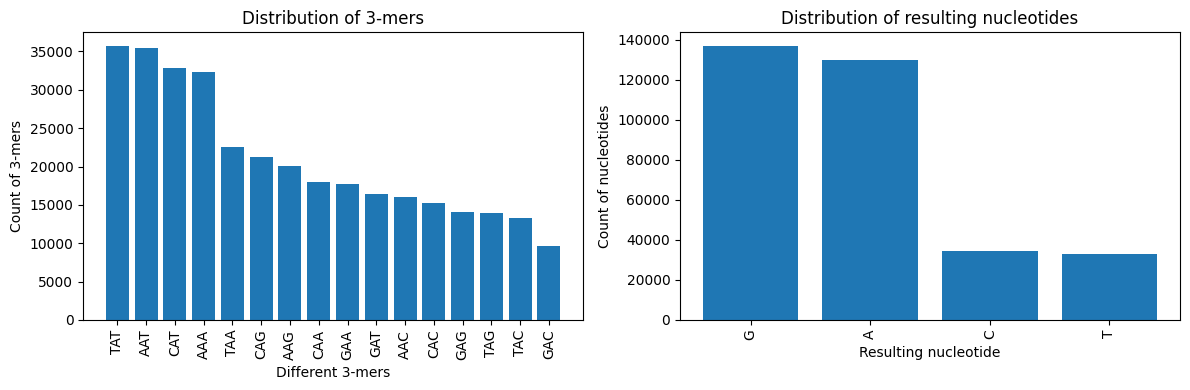

In [59]:
plot_distr(df)